In [192]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
def interpolator(p0, p1, q0, q1):
    """
    finds the root by straight line interpolation
    """
    root = p0 + ((p1 - p0)/(q1 - q0))*(q0)
    return root

BVP problem:
y'' = sqrt(y'**2 + 1)
with boundary values:
y(0) = 1 and
y(1) = 1
solved at x from 0 to 1


Two DE from this BVP: 
dy/dx = z
dz/dx = sqrt(z**2 + 1)


In [194]:
# function definitions
def f1(z):
    return z

def f2(z):
    return np.sqrt(z**2 + 1)

In [195]:
#Euler integrator

def euler(f1, f2, y, z, h):
    y[0] = y_0
    z[0] = z_0    # z = dy/dx
    # Solution
    for i in range(np.size(y)-1):
        y[i+1] = y[i] +f1(z[i])*h
        z[i+1] = z[i] +f2(z[i])*h
    return y,z 

In [196]:
# Guess 1: y'(0) = -1.0 

y_0 = 1.0
z_0 = -1.0
a = 0.0
b = 1.0
N = 2000
x_space = np.linspace(a,b,N)
h = (b-a)/N
y = np.zeros(np.size(x_space))
z = np.zeros(np.size(x_space))

In [197]:
sy0, sz0 =  euler(f1, f2, y, z, h)
print sy0
guess0 = sy0[-1] # fetching the last element of sy0 array

[ 1.          0.9995      0.99900035 ...,  0.59243797  0.59249671
  0.5925557 ]


In [198]:
# It can be seen (last member of sy0) that we get y(1) = 0.5925557 while y(1) = 1.0 is desired, a new guess is needed

# Guess 2: y'(0) = 1.0, everything stays the same, we only update the new guess
z_0 = 1.0


In [199]:
sy1, sz1 = euler(f1, f2, y, z, h)
print sy1
guess1 = sy1[-1]

[ 1.          1.0005      1.00100035 ...,  2.93761852  2.93921817
  2.94081867]


In [200]:
# new guess puts y(1) = 2.94081867....a bit too high for desired y(1) = 1.0. Linear interpolation between the previous guesses 
# may provide a suitable new guess
interpolator(-1.0, 1.0, guess0, guess1)

-0.49532423482396326

In [201]:
# for the guess y'(0) = -0.4953 we get a reasonable match (all factors considered) y(1) = 1.02
z_0 = -0.4953
euler(f1, f2, y, z, h)

(array([ 1.        ,  0.99975235,  0.99950498, ...,  1.02290619,
         1.02317892,  1.02345193]),
 array([-0.4953    , -0.49474203, -0.49418418, ...,  0.54545112,
         0.54602066,  0.54659034]))

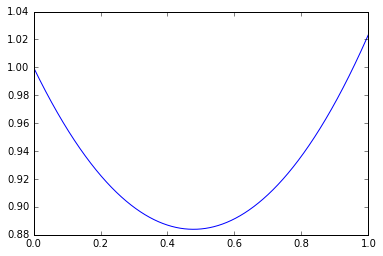

In [202]:
# Plotting the solution
sy_fin, sz_fin = euler(f1, f2, y, z, h)
plt.plot(x_space, sy_fin)
plt.show()